  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...


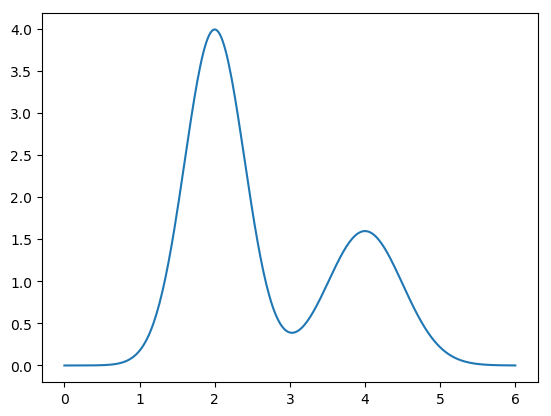

  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a405ff98>

In [1]:
using PyCall
# import Pkg; Pkg.add("ApproxFun")
include("src/gauss_error.jl")
include("src/kernels.jl")

a = 0.
b = 6.

function phi(x::Float64)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5

    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

x = collect(range(a, stop=b, length=300))

using PyPlot
myplot = plot(x, phi.(x))

In [2]:
kernel_name = "triangular"

function kernel(x::Float64, y::Float64)
    return getOpticsKernels(kernel_name)(x, y)
end

kernel (generic function with 1 method)

┌ Info: Recompiling stale cache file /Users/ta_nyan/.julia/compiled/v1.1/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184


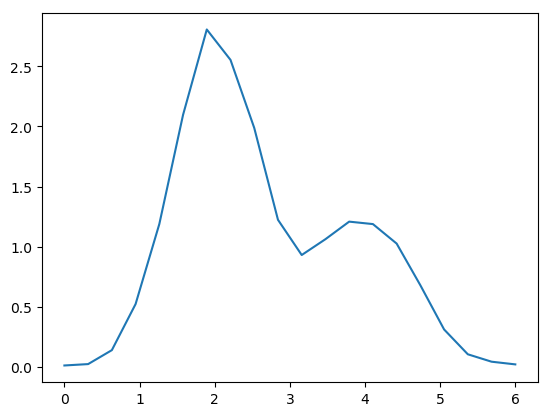

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x128c701d0>

In [3]:
convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, rtol=10^-5, maxevals=10^7)[1]
y = collect(range(a, stop=b, length=20))
ftrue = convolution.(y)
sig = 0.05*ftrue + [0.01 for i = 1:Base.length(ftrue)]
using Compat, Random, Distributions
noise = []
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end
f = ftrue + noise
plot(y, f)

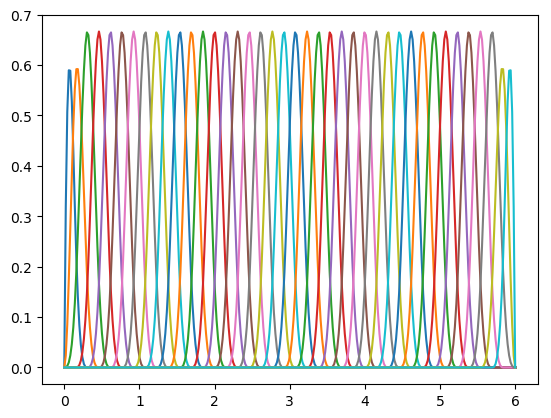

40


In [4]:
knots = collect(range(a, b, length=40))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
for basis_function in basis.basis_functions
    plot(x, basis_function.f.(x))
end
println(length(basis))

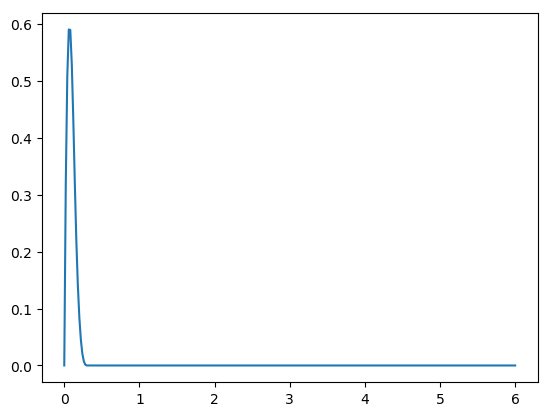

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a48820f0>

In [23]:
y = collect(range(a, stop=6, length=300))
plot(y, basis.basis_functions[1].f.(y))
# for z in collect(range(a, stop=6, length=300))
#     println(z, " ", basis.basis_functions[3].f(z))
# end

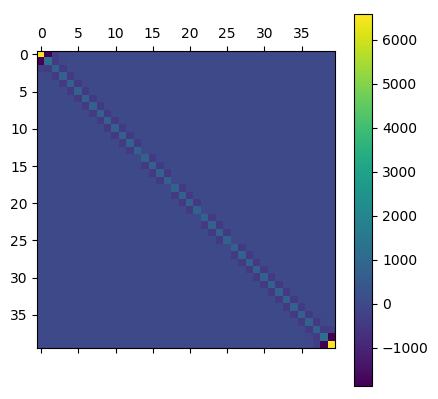

40

PyObject <matplotlib.colorbar.Colorbar object at 0x1a48b07f0>

In [6]:
print(length(basis))
my_omega = omega(basis, 2)[1]
# for i = 1:size(my_omega)[1]
#     for j = 1:size(my_omega)[1]
#         my_omega[i, j] = abs(my_omega[i, j])
#     end
# end
matshow(my_omega)
colorbar()

In [7]:
include("src/b_spline_implementation.jl")

In [8]:
knots = collect(range(a, b, length=40))
my_knots = [0.0, 0.0, 0.0, 0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462, 1.53846, 1.69231, 1.84615, 2.0, 2.15385, 2.30769, 2.46154, 2.61538, 2.76923, 2.92308, 3.07692, 3.23077, 3.38462, 3.53846, 3.69231, 3.84615, 4.0, 4.15385, 4.30769, 4.46154, 4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0, 6.0, 6.0, 6.0]
my_b_spline = BSpline(3, 3, knots)

BSpline(3, 3, [0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462  …  4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0], getfield(Main, Symbol("##115#117")){Int64,Int64,Array{Float64,1}}(3, 3, [0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462  …  4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0], Core.Box(getfield(Main, Symbol("#b_spline_function#116"))(Core.Box(#= circular reference @-2 =#)))))

In [9]:
my_b_spline_func = my_b_spline.func

#115 (generic function with 1 method)

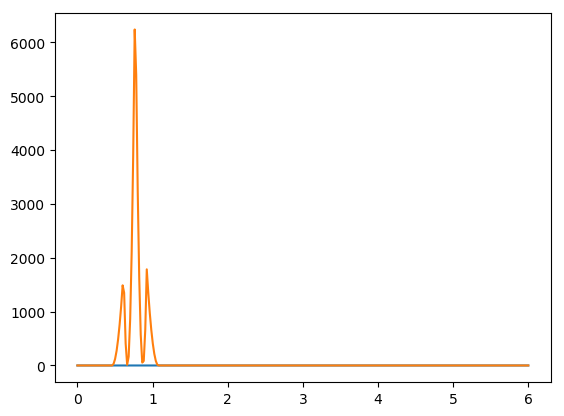

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a6ab5ef0>

In [18]:
# import Pkg;
# Pkg.rm()
# Pkg.add("Calculus")
using Calculus

y = collect(range(a, stop=6, length=300))
plot(y, my_b_spline_func.(y))
der = [derivative(my_b_spline, y1, 2)^2 for y1 in y]
# der1 = [Calculus.second_derivative(my_b_spline_func, y1)^2 for y1 in y]
plot(y, der)
# plot(y, der1)

In [19]:
res = quadgk(y -> derivative(my_b_spline, y, 2)^2, a, b, rtol=10^-5, maxevals=10^7)[1]

732.3313349991764

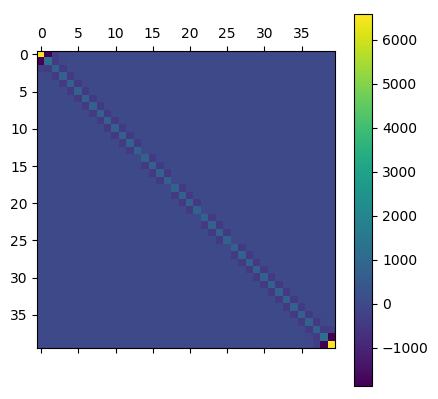

PyObject <matplotlib.colorbar.Colorbar object at 0x1a4d31ac8>

In [12]:
knots = collect(range(a, b, length=40))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
my_omega = omega(basis, 2)[1]
matshow(my_omega)
colorbar()

In [20]:
my_omega[3, 3]

732.3333330289543

In [28]:
for i in collect(1:20)
    println(i, " ", my_omega[i, i+1])
end

1 -1853.718749783963
2 -366.1666652226041
3 -411.93749930757616
4 -411.93749948403325
5 -411.937500066751
6 -411.9374997239893
7 -411.93749981123585
8 -411.93750034294794
9 -411.9374988436763
10 -411.9374984493077
11 -411.93749959539736
12 -411.9374996352
13 -411.9374995432683
14 0.0
15 -411.93749828825037
16 -411.9374981266801
17 -411.9374987405825
18 0.0
19 -411.93750001397063
20 -411.9374987847804


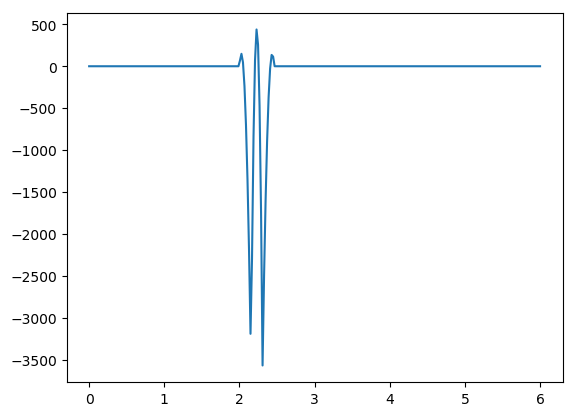

-411.9356538348601

In [36]:
my_b_spline1 = BSpline(12, 3, knots)
my_b_spline2 = BSpline(13, 3, knots)

y = collect(range(a, stop=6, length=300))
# plot(y, my_b_spline1.func.(y))
# plot(y, my_b_spline2.func.(y))
der = [derivative(my_b_spline1, y1, 2)*derivative(my_b_spline2, y1, 2) for y1 in y]
plot(y, der)
res = quadgk(y -> derivative(my_b_spline1, y, 2)*derivative(my_b_spline2, y, 2), a, b, rtol=10^-5, maxevals=10^7)[1]

In [42]:
n = 20
omega1 = zeros(Float64, n, n)
for i in collect(10:20)
     for j in collect(10:20)
        my_b_spline1 = BSpline(i, 3, knots)
        my_b_spline2 = BSpline(j, 3, knots)

        y = collect(range(a, stop=6, length=300))
        der = [derivative(my_b_spline1, y1, 2)*derivative(my_b_spline2, y1, 2) for y1 in y]
        res = quadgk(y -> derivative(my_b_spline1, y, 2)*derivative(my_b_spline2, y, 2), a, b, rtol=10^-5, maxevals=10^4)[1]
        omega1[i, j] = res
    end
end
        

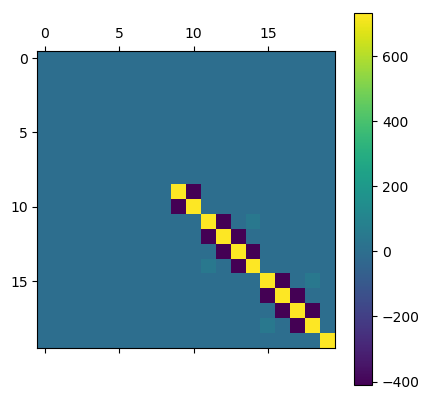

PyObject <matplotlib.colorbar.Colorbar object at 0x1a835c4e0>

In [43]:
matshow(omega1)
colorbar()

In [49]:
for i in collect(10:19)
    println(i, " ", omega1[i, i+1])
end

10 -411.937126465775
11 0.0
12 -411.9356538348601
13 -411.9364106426413
14 -411.9362892022166
15 0.0
16 -411.9359748602109
17 -411.93559367590524
18 -411.9359748602109
19 0.0


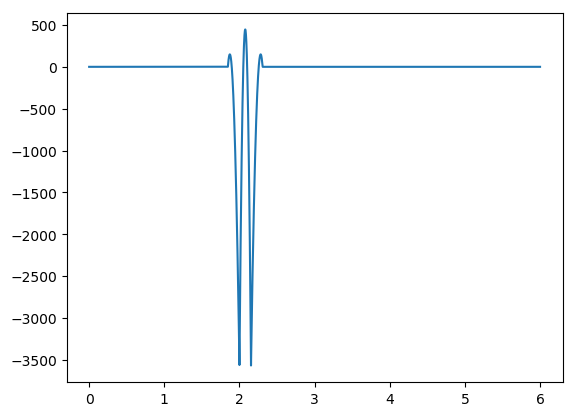

(0.0, 0.0)

In [61]:
i = 11
j = 12
my_b_spline1 = BSpline(i, 3, knots)
my_b_spline2 = BSpline(j, 3, knots)

y = collect(range(a, stop=6, length=30000))
function my_der(y2)
    return derivative(my_b_spline1, y2, 2)*derivative(my_b_spline2, y2, 2)
end
der = [my_der(y3) for y3 in y]
plot(y, der)
res = quadgk(y4 -> my_der(y4), 0, 6, rtol=10^-5, maxevals=10^6)

In [74]:
s = 0
for x in collect(range(0, stop=6, length=10^6))
    y = my_der2(x)
    s += (y * 6 / 10^6)
end
println(s)

-411.9370891067619


In [77]:
function my_der2(y2)
    println("iter")
    return derivative(my_b_spline1, y2, 2)*derivative(my_b_spline2, y2, 2)
end

my_der2 (generic function with 1 method)

In [79]:
println(quadgk(my_der2, 0, 6, order=100))

iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


In [73]:
println(quadgk(my_der2, 0, 6))#, rtol=10^-5, maxevals=10^6))
# println(quadgk(my_der2, 0, 1.8))
# println(quadgk(my_der2, 1.8, 2.5))
# println(quadgk(my_der2, 2.5, 6))

(0.0, 0.0)
(0.0, 0.0)
(-411.9374909384459, 4.045425256923797e-6)
(0.0, 0.0)


In [ ]:
println(quadgk(my_der2, 0, 6))